### Loading libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')

### Loading data

In [2]:
file_path = 'books.csv'
books_data = pd.read_csv(file_path)

In [3]:
books_data.head()

,isbn,book_title,category,rental_price,status,author,publisher
0,978-0-553-29698-2,The Catcher in the Rye,Classic,7.0,yes,J.D. Salinger,"Little, Brown and Company"
1,978-0-330-25864-8,Animal Farm,Classic,5.5,yes,George Orwell,Penguin Books
2,978-0-14-118776-1,One Hundred Years of Solitude,Literary Fiction,6.5,yes,Gabriel Garcia Marquez,Penguin Books
3,978-0-525-47535-5,The Great Gatsby,Classic,8.0,yes,F. Scott Fitzgerald,Scribner
4,978-0-141-44171-6,Jane Eyre,Classic,4.0,no,Charlotte Bronte,Penguin Classics


In [4]:
books_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   isbn          35 non-null     object 
 1   book_title    35 non-null     object 
 2   category      35 non-null     object 
 3   rental_price  35 non-null     float64
 4   status        35 non-null     object 
 5   author        35 non-null     object 
 6   publisher     35 non-null     object 
dtypes: float64(1), object(6)
memory usage: 2.0+ KB


In [5]:
print(books_data.describe())

       rental_price
count     35.000000
mean       6.314286
std        1.435299
min        2.500000
25%        5.500000
50%        6.500000
75%        7.000000
max        9.000000


### Label encoding

In [6]:
# Encode categorical variables for visualization
label_encoders = {}
categorical_columns = ['category', 'author', 'publisher', 'status']

for column in categorical_columns:
    le = LabelEncoder()
    books_data[column] = le.fit_transform(books_data[column])
    label_encoders[column] = le

### Data Visualization

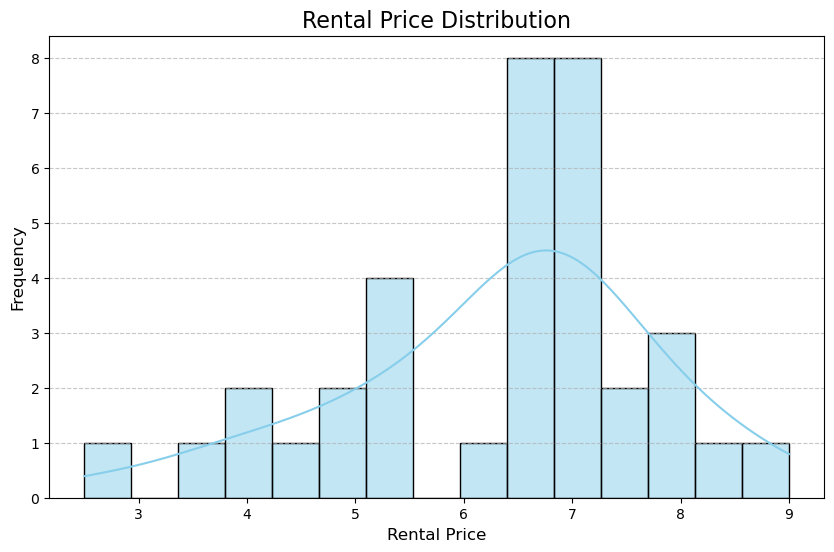

In [7]:
# Rental Price Distribution with Kernel Density
plt.figure(figsize=(10, 6))
sns.histplot(books_data['rental_price'], kde=True, color="skyblue", bins=15, edgecolor="black")
plt.title('Rental Price Distribution', fontsize=16)
plt.xlabel('Rental Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

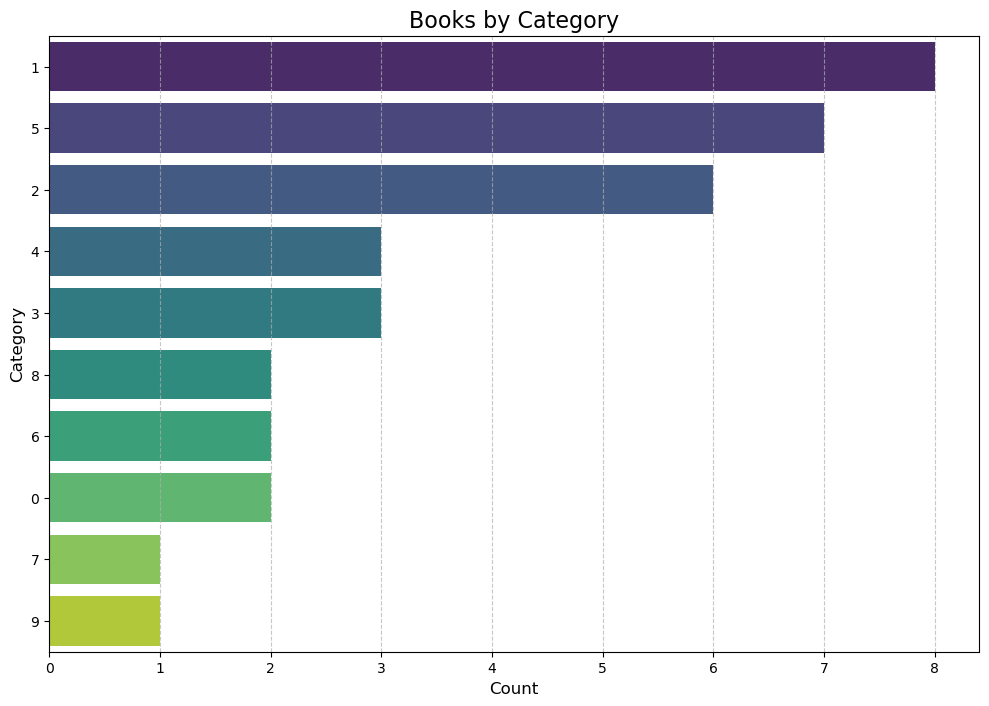

In [8]:
# Books by Category (Horizontal Bar Chart)
plt.figure(figsize=(12, 8))
sns.countplot(y=books_data['category'], order=books_data['category'].value_counts().index, palette="viridis")
plt.title('Books by Category', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

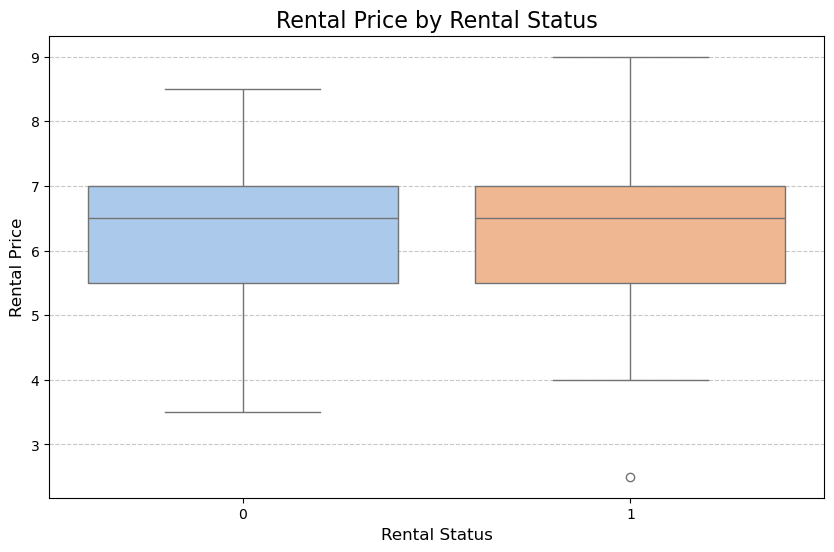

In [9]:
# Relationship between Rental Price and Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='status', y='rental_price', data=books_data, palette="pastel")
plt.title('Rental Price by Rental Status', fontsize=16)
plt.xlabel('Rental Status', fontsize=12)
plt.ylabel('Rental Price', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

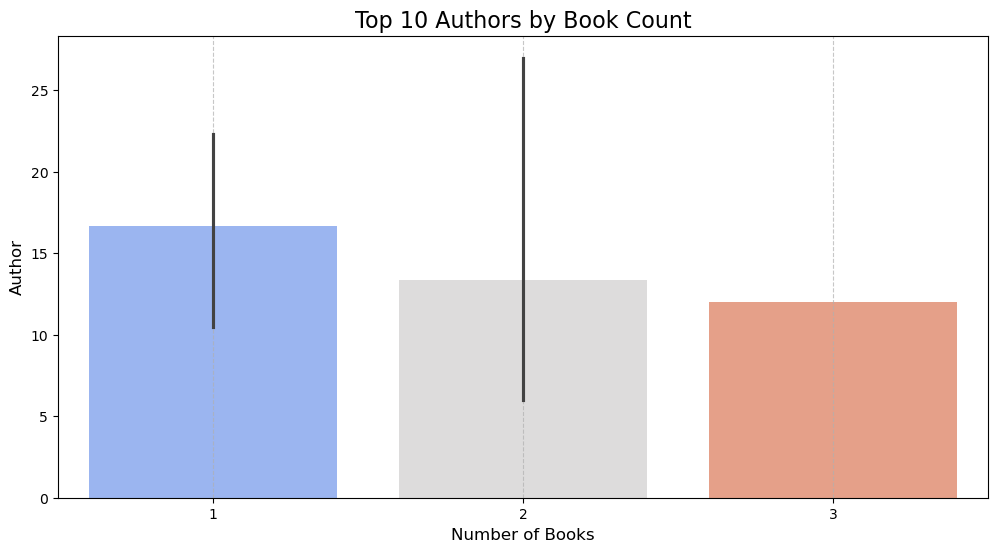

In [10]:
# Top 10 Authors by Frequency
top_authors = books_data['author'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_authors.values, y=top_authors.index, palette="coolwarm")
plt.title('Top 10 Authors by Book Count', fontsize=16)
plt.xlabel('Number of Books', fontsize=12)
plt.ylabel('Author', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

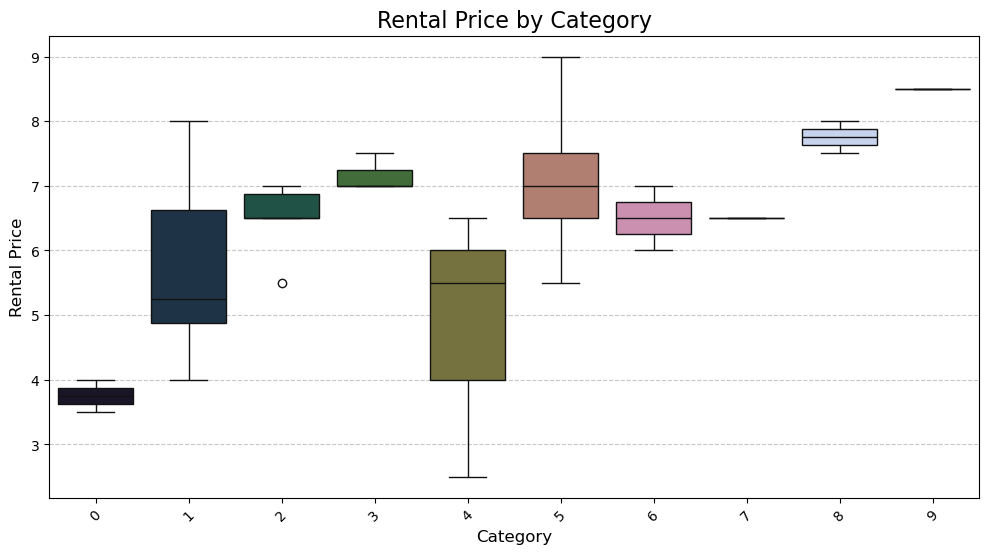

In [11]:
# Rental Price by Category (Boxplot)
plt.figure(figsize=(12, 6))
sns.boxplot(x='category', y='rental_price', data=books_data, palette="cubehelix")
plt.title('Rental Price by Category', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Rental Price', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

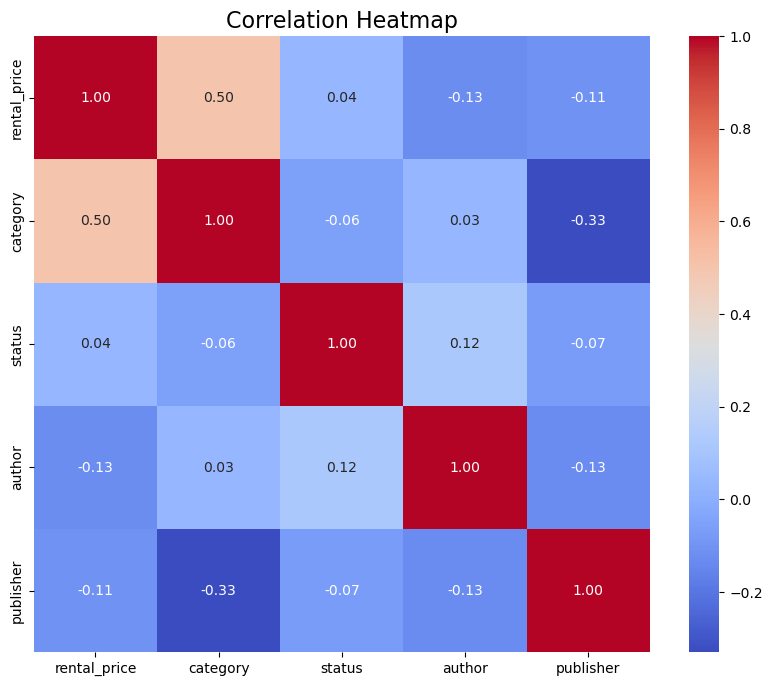

In [12]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
corr = books_data[['rental_price', 'category', 'status', 'author', 'publisher']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

### Data spliting

In [13]:
# Splitting data into features (X) and target (y)
X = books_data[['category', 'rental_price', 'author', 'publisher']]
y = books_data['status']

In [14]:
# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model fit

#### Decision tree

In [15]:
# Model Training
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predictions on test set
dt_y_pred = dt_model.predict(X_test)

In [16]:
# Model Evaluation
dt_accuracy = accuracy_score(y_test, dt_y_pred)
class_report = classification_report(y_test, dt_y_pred, target_names=label_encoders['status'].classes_)

In [18]:
# Print results
print(f"Accuracy: {dt_accuracy:.2f}")
print("Classification Report:")
print(class_report)

Accuracy: 0.86
Classification Report:
              precision    recall  f1-score   support

          no       1.00      0.50      0.67         2
         yes       0.83      1.00      0.91         5

    accuracy                           0.86         7
   macro avg       0.92      0.75      0.79         7
weighted avg       0.88      0.86      0.84         7



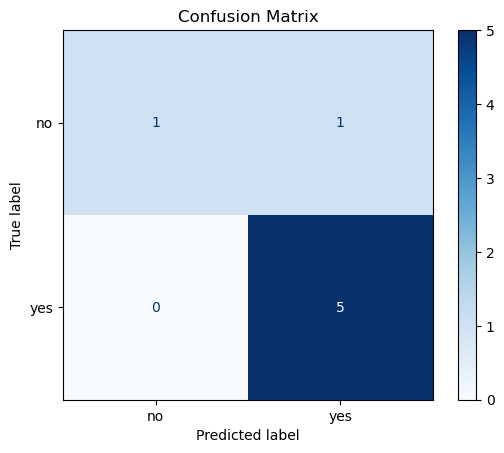

In [19]:
# Confusion Matrix Visualization
conf_matrix_display = ConfusionMatrixDisplay.from_estimator(
    dt_model, X_test, y_test, display_labels=label_encoders['status'].classes_, cmap='Blues'
)
plt.title("Confusion Matrix")
plt.show()

#### Logistic Regression

In [20]:
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [21]:
lr_y_pred = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_y_pred)
class_report = classification_report(y_test, lr_y_pred, target_names=label_encoders['status'].classes_)

In [22]:
print(f"Logistic Regression Accuracy: {lr_accuracy:.2f}")
print("Classification Report:")
print(class_report)

Logistic Regression Accuracy: 0.71
Classification Report:
              precision    recall  f1-score   support

          no       0.00      0.00      0.00         2
         yes       0.71      1.00      0.83         5

    accuracy                           0.71         7
   macro avg       0.36      0.50      0.42         7
weighted avg       0.51      0.71      0.60         7



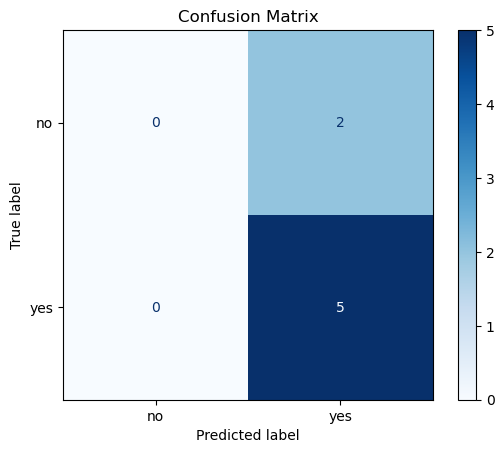

In [23]:
# Confusion Matrix Visualization
conf_matrix_display = ConfusionMatrixDisplay.from_estimator(
    lr_model, X_test, y_test, display_labels=label_encoders['status'].classes_, cmap='Blues'
)
plt.title("Confusion Matrix")
plt.show()

### Comparison of Accuracies

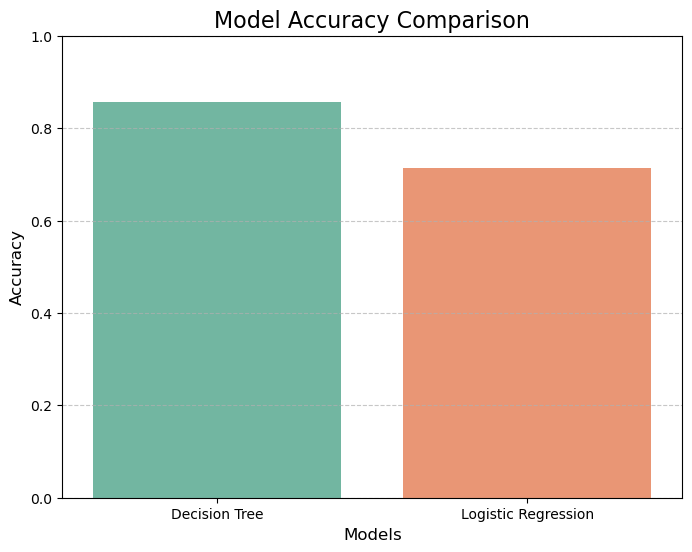

In [24]:
models = ['Decision Tree', 'Logistic Regression']
accuracies = [dt_accuracy, lr_accuracy]

plt.figure(figsize=(8, 6))
sns.barplot(x=models, y=accuracies, palette="Set2")
plt.title('Model Accuracy Comparison', fontsize=16)
plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()